# Importing Libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import pingouin as pg
import missingno as msno
import matplotlib.pyplot as plt
sns.set()

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics as mt
from sklearn import model_selection
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing as pr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore") # Don't display the warnings in the notebook

# Reading data and initial checks

In [2]:
data0 = pd.read_csv("train.csv")
data0.sample(10)

,ID,Price,Manufacturer,Year,Category,Leather,Fuel,Engine,Cylinders,Transmission,Drive,Doors,Color,Airbags,Km,Turbo,Origin
11251,45804222,25299,HYUNDAI,2010,SUV,Yes,Diesel,2.0,4.0,Automatic,Front,4,Silver,4,111200,0,Korea
6567,45120058,38400,BMW,2012,Sedan,Yes,Petrol,2.0,4.0,Tiptronic,Rear,4,Black,12,158400,1,Germany
9125,45808588,3763,KIA,2015,Sedan,Yes,Petrol,2.4,4.0,Automatic,Front,4,Silver,12,170040,0,Korea
2030,45794207,19757,FORD,2006,Minivan,No,Diesel,2.4,4.0,Manual,Rear,2,White,4,286000,1,US
5655,44092830,18503,VOLKSWAGEN,2012,Sedan,Yes,Petrol,2.5,4.0,Tiptronic,Front,4,Silver,8,180000,0,Germany
7807,44657994,9095,OPEL,2007,Hatchback,No,Petrol,1.6,4.0,Manual,Front,4,Silver,6,190000,0,Germany
408,45776513,7840,MERCEDES-BENZ,2000,Sedan,No,Petrol,2.0,4.0,Tiptronic,Rear,4,Blue,6,136000,0,Germany
1874,45766501,21639,TOYOTA,2016,Sedan,No,Petrol,1.8,4.0,Automatic,Front,4,Grey,10,131000,0,Japan
12221,45759947,12544,MITSUBISHI,2000,Minivan,Yes,LPG,3.0,6.0,Automatic,4x4,4,White,2,161000,0,Japan
11455,45768897,18817,AUDI,2014,Sedan,Yes,Petrol,2.0,4.0,Automatic,4x4,4,Black,0,279722,0,Germany


In [3]:
data = data0.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12725 entries, 0 to 12724
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            12725 non-null  int64  
 1   Price         12725 non-null  int64  
 2   Manufacturer  12725 non-null  object 
 3   Year          12725 non-null  int64  
 4   Category      12725 non-null  object 
 5   Leather       12725 non-null  object 
 6   Fuel          12725 non-null  object 
 7   Engine        12725 non-null  float64
 8   Cylinders     12725 non-null  float64
 9   Transmission  12725 non-null  object 
 10  Drive         12725 non-null  object 
 11  Doors         12725 non-null  int64  
 12  Color         12725 non-null  object 
 13  Airbags       12725 non-null  int64  
 14  Km            12725 non-null  int64  
 15  Turbo         12725 non-null  int64  
 16  Origin        12725 non-null  object 
dtypes: float64(2), int64(7), object(8)
memory usage: 1.7+ MB


In [4]:
data.isnull().sum()

ID              0
Price           0
Manufacturer    0
Year            0
Category        0
Leather         0
Fuel            0
Engine          0
Cylinders       0
Transmission    0
Drive           0
Doors           0
Color           0
Airbags         0
Km              0
Turbo           0
Origin          0
dtype: int64

As I don't have any missing data, firstly, I will check the data types and I will drop "ID" column.

In [5]:
data.drop("ID",axis=1,inplace=True)
data.sample(10)

,Price,Manufacturer,Year,Category,Leather,Fuel,Engine,Cylinders,Transmission,Drive,Doors,Color,Airbags,Km,Turbo,Origin
11439,40769,HONDA,2015,SUV,No,Petrol,2.4,4.0,Variator,4x4,4,White,8,39700,0,Japan
5338,15994,TOYOTA,2008,Sedan,Yes,Hybrid,2.4,4.0,Tiptronic,Front,4,Silver,10,221000,0,Japan
4699,61154,LEXUS,2015,SUV,Yes,Petrol,4.6,8.0,Automatic,4x4,4,Silver,0,273493,0,Japan
4329,10976,NISSAN,2014,Hatchback,Yes,Petrol,1.6,4.0,Automatic,Front,4,Sky blue,8,91000,0,Japan
390,44247,HYUNDAI,2015,SUV,Yes,Diesel,2.0,4.0,Automatic,Front,4,White,4,153958,0,Korea
7122,10036,HYUNDAI,2014,Sedan,Yes,LPG,2.0,4.0,Automatic,Front,4,Silver,4,486631,0,Korea
4996,18817,FORD,2007,SUV,Yes,Hybrid,2.3,4.0,Variator,4x4,4,Grey,12,180000,0,US
7062,30151,HYUNDAI,2015,SUV,Yes,Diesel,2.0,4.0,Automatic,Front,4,Grey,4,143278,0,Korea
8488,18817,MERCEDES-BENZ,2007,Minivan,No,Diesel,2.2,4.0,Manual,Rear,2,White,2,22004,1,Germany
11438,59586,TOYOTA,2018,Sedan,Yes,Hybrid,2.5,4.0,Variator,Front,4,Black,8,18200,0,Japan


In [6]:
data.columns

Index(['Price', 'Manufacturer', 'Year', 'Category', 'Leather', 'Fuel',
       'Engine', 'Cylinders', 'Transmission', 'Drive', 'Doors', 'Color',
       'Airbags', 'Km', 'Turbo', 'Origin'],
      dtype='object')

In [7]:
col_check = ['Manufacturer', 'Category', 'Leather', 'Fuel',
       'Engine', 'Cylinders', 'Transmission', 'Drive', 'Doors', 'Color',
       'Airbags', 'Turbo', 'Origin']

for i in col_check:
    print(data.value_counts(i))    

Manufacturer
HYUNDAI          3291
TOYOTA           2393
MERCEDES-BENZ    1270
CHEVROLET         791
BMW               735
FORD              682
HONDA             668
LEXUS             491
NISSAN            448
SSANGYONG         429
VOLKSWAGEN        416
KIA               333
OPEL              232
MITSUBISHI        212
SUBARU            193
AUDI              141
dtype: int64
Category
Sedan        5862
SUV          3522
Hatchback    1910
Minivan       771
Coupe         353
Universal     307
dtype: int64
Leather
Yes    8956
No     3769
dtype: int64
Fuel
Petrol    6444
Diesel    3030
Hybrid    2101
LPG       1150
dtype: int64
Engine
2.0    3421
2.5    1586
1.8    1268
1.6    1202
1.5    1039
3.0     663
3.5     610
2.4     558
2.2     343
1.3     336
1.4     299
4.6     207
3.2     129
1.7     127
2.7     115
3.3      90
2.3      88
1.2      74
4.4      64
4.7      59
4.0      55
2.8      51
5.0      51
5.5      49
1.9      36
3.7      33
3.6      29
4.8      24
3.8      23
2.6      15
2.

I want to note the domninat values in case of need to further investigate later: Cylinders (4.0), Doors(4), Turbo(0). 

I will calculate "Age" and add a column to use instead of "Year" variable.

In [8]:
data["Age"] = 2023 - data.Year

In [9]:
data.drop("Year",axis = 1, inplace=True)
data.sample(5)

,Price,Manufacturer,Category,Leather,Fuel,Engine,Cylinders,Transmission,Drive,Doors,Color,Airbags,Km,Turbo,Origin,Age
12134,52034,FORD,SUV,Yes,Petrol,3.5,4.0,Automatic,Front,4,White,4,127923,0,US,8
8031,56450,TOYOTA,SUV,Yes,Petrol,4.0,6.0,Automatic,4x4,4,Grey,0,135000,0,Japan,9
4067,19121,HYUNDAI,Sedan,Yes,Petrol,1.6,4.0,Automatic,Front,4,Grey,4,78633,0,Korea,10
5955,25716,BMW,SUV,Yes,Petrol,3.0,6.0,Tiptronic,4x4,4,Black,12,125000,0,Germany,15
872,67404,HYUNDAI,Sedan,Yes,Petrol,2.0,4.0,Automatic,Front,4,Black,4,40808,0,Korea,5


In [10]:
data.describe(include="all")

,Price,Manufacturer,Category,Leather,Fuel,Engine,Cylinders,Transmission,Drive,Doors,Color,Airbags,Km,Turbo,Origin,Age
count,12725.000000,12725,12725,12725,12725,12725.000000,12725.000000,12725,12725,12725.000000,12725,12725.000000,12725.000000,12725.000000,12725,12725.000000
unique,NaN,16,6,2,4,NaN,NaN,4,3,NaN,16,NaN,NaN,NaN,4,NaN
top,NaN,HYUNDAI,Sedan,Yes,Petrol,NaN,NaN,Automatic,Front,NaN,Black,NaN,NaN,NaN,Japan,NaN
freq,NaN,3291,5862,8956,6444,NaN,NaN,8473,9085,NaN,3163,NaN,NaN,NaN,4405,NaN
mean,21820.219725,NaN,NaN,NaN,NaN,2.234837,4.494931,NaN,NaN,3.944754,NaN,6.217760,144411.909941,0.113006,NaN,11.910963
std,16059.270358,NaN,NaN,NaN,NaN,0.769273,1.103954,NaN,NaN,0.359687,NaN,3.836013,97022.276654,0.316612,NaN,5.140345
min,2100.000000,NaN,NaN,NaN,NaN,1.100000,3.000000,NaN,NaN,2.000000,NaN,0.000000,10084.000000,0.000000,NaN,3.000000
25%,11290.000000,NaN,NaN,NaN,NaN,1.800000,4.000000,NaN,NaN,4.000000,NaN,4.000000,78000.000000,0.000000,NaN,8.000000
50%,17249.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,4.000000,NaN,4.000000,127200.000000,0.000000,NaN,11.000000
75%,26657.000000,NaN,NaN,NaN,NaN,2.500000,4.000000,NaN,NaN,4.000000,NaN,10.000000,185000.000000,0.000000,NaN,14.000000


Checking the target value's distribution:

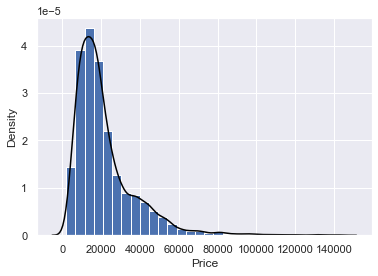

In [11]:
plt.hist(data.Price, density=True, bins=30)
sns.kdeplot(data.Price,color='black')
plt.show()

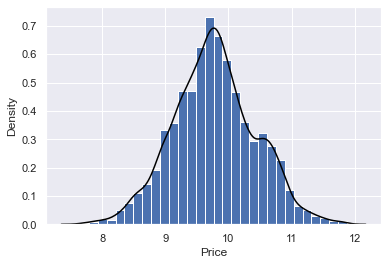

In [12]:
log_target = np.log1p(data.Price)
plt.hist(log_target, density=True, bins=30)
sns.kdeplot(log_target,color='black')
plt.show()

It seems original Price values distribution is skewed, so I will use log version of it.
Let's define the categorical variables and numeric variables before modeling.

In [13]:
data.dtypes

Price             int64
Manufacturer     object
Category         object
Leather          object
Fuel             object
Engine          float64
Cylinders       float64
Transmission     object
Drive            object
Doors             int64
Color            object
Airbags           int64
Km                int64
Turbo             int64
Origin           object
Age               int64
dtype: object

In [14]:
cat_var = []
num_var = []
cats = data.select_dtypes(include=["category","object"])
nums = data.select_dtypes(include=["int64","float64"])

for i in cats.columns:
    cat_var.append(i)
    
for i in nums.columns:
    num_var.append(i)

In [15]:
print(cat_var)
print(num_var)

['Manufacturer', 'Category', 'Leather', 'Fuel', 'Transmission', 'Drive', 'Color', 'Origin']
['Price', 'Engine', 'Cylinders', 'Doors', 'Airbags', 'Km', 'Turbo', 'Age']


## Creating dummy variables for all categorical attributes and finalizing the data examination for now.

I will remove Price variable from list. The Turbo variable can be considered as "cat_var" but it's dummied already ("1","0")
Doors has only 3 groups of values, so I consider it as categorical variable.

In [16]:
cat_var = ['Manufacturer', 'Category', 'Leather', 'Fuel', 'Transmission', 'Drive', 'Color', 'Origin','Doors']
num_var = ['Engine', 'Cylinders', 'Airbags', 'Km', 'Age','Turbo']
df_cat = data[cat_var]
df_num = data[num_var]
target = data.Price

df_cat_dummy = pd.get_dummies(df_cat, drop_first = True) # drops one dummy
X = pd.concat([df_num, df_cat_dummy], axis = 1) # Concatenate dummy cat vars and num vars

y = np.log1p(target)

In [17]:
X.sample(5)

,Engine,Cylinders,Airbags,Km,Age,Turbo,Doors,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_FORD,...,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Origin_Japan,Origin_Korea,Origin_US
6927,2.8,4.0,6,150000,25,0,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5971,2.3,4.0,2,220000,31,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,2.2,4.0,4,380000,27,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1629,2.7,4.0,12,397915,10,0,4,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1592,3.2,4.0,4,320000,23,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X.columns

Index(['Engine', 'Cylinders', 'Airbags', 'Km', 'Age', 'Turbo', 'Doors',
       'Manufacturer_BMW', 'Manufacturer_CHEVROLET', 'Manufacturer_FORD',
       'Manufacturer_HONDA', 'Manufacturer_HYUNDAI', 'Manufacturer_KIA',
       'Manufacturer_LEXUS', 'Manufacturer_MERCEDES-BENZ',
       'Manufacturer_MITSUBISHI', 'Manufacturer_NISSAN', 'Manufacturer_OPEL',
       'Manufacturer_SSANGYONG', 'Manufacturer_SUBARU', 'Manufacturer_TOYOTA',
       'Manufacturer_VOLKSWAGEN', 'Category_Hatchback', 'Category_Minivan',
       'Category_SUV', 'Category_Sedan', 'Category_Universal', 'Leather_Yes',
       'Fuel_Hybrid', 'Fuel_LPG', 'Fuel_Petrol', 'Transmission_Manual',
       'Transmission_Tiptronic', 'Transmission_Variator', 'Drive_Front',
       'Drive_Rear', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Col

In [19]:
y.sample(5)

9056     9.486380
2479     8.422443
462      9.755567
4918    10.091998
541      9.967729
Name: Price, dtype: float64

## Split the data into train and test sets and Start Creating Model0

In [20]:
# Model0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

r2 = mt.r2_score(y_test,prediction)
mse = mt.mean_squared_error(y_test,prediction)
rmse = mt.mean_squared_error(y_test,prediction,squared=False)
mae = mt.mean_absolute_error(y_test,prediction)

print("R2: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2:  0.6180442495198288
MSE:  0.15229753102827456
RMSE:  0.39025316273961774
MAE:  0.2997104554362891


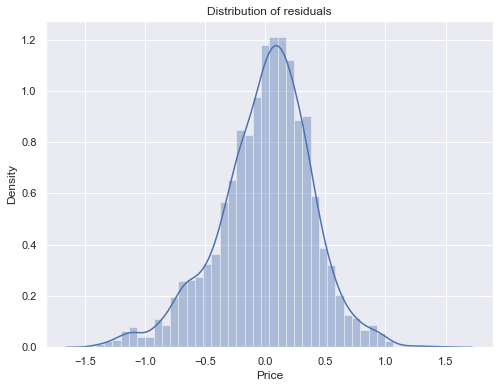

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(y_test - prediction)
plt.title('Distribution of residuals');

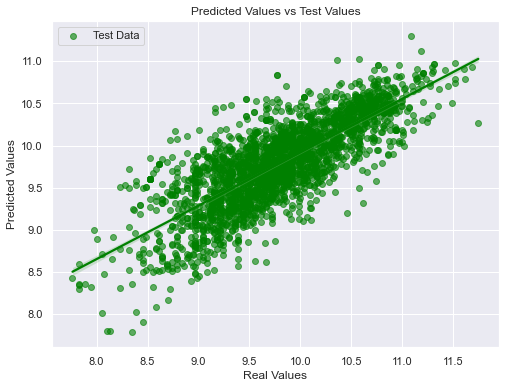

In [22]:
# Scatterplot of Predictions Vs. Actual Values
plt.figure(figsize=(8,6))
sns.regplot(y = prediction, x = y_test, color = 'green', label = 'Test Data', scatter_kws={'alpha':0.6})
plt.title('Predicted Values vs Test Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

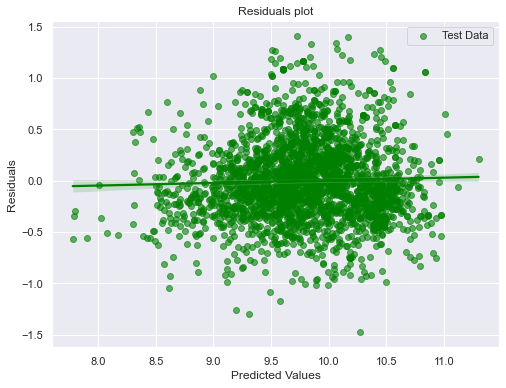

In [23]:
# Plotting Residuals
plt.figure(figsize=(8,6))
sns.regplot(x = prediction, y = prediction - y_test, label = 'Test Data', color = 'green', scatter_kws={'alpha':0.6})
plt.legend(loc = 'best')
plt.title('Residuals plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

## Model0 : As we can see residuals' distrubition is normal and plot result seemed to have almost homogeneity. So, I can understand that we can only make model tuning from now on.

# Checking Correlations

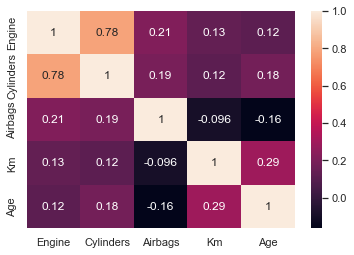

In [24]:
# Corr of Numerical Variables
num_var2 = ['Engine', 'Cylinders', 'Airbags', 'Km', 'Age']
df_num2 = data[num_var2]

corr_num = df_num2.corr()
sns.heatmap(corr_num,annot=True)
plt.show()

We have seen that there is a correlation between the cylinder and the engine itself. Now we will look at the correlation with the target

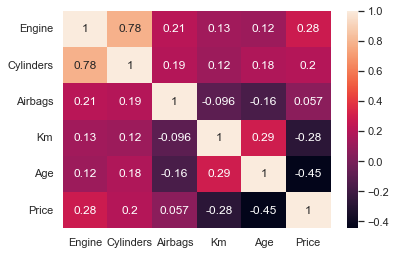

In [25]:
num_var3 = ['Engine', 'Cylinders', 'Airbags', 'Km', 'Age', 'Price']
df_num3 = data[num_var3]

corr_num = df_num3.corr()
sns.heatmap(corr_num,annot=True)
plt.show()

Engine and Cylinder have low corr with Price. So I decided to drop "Cylinder" variable. Let's look at the plots:

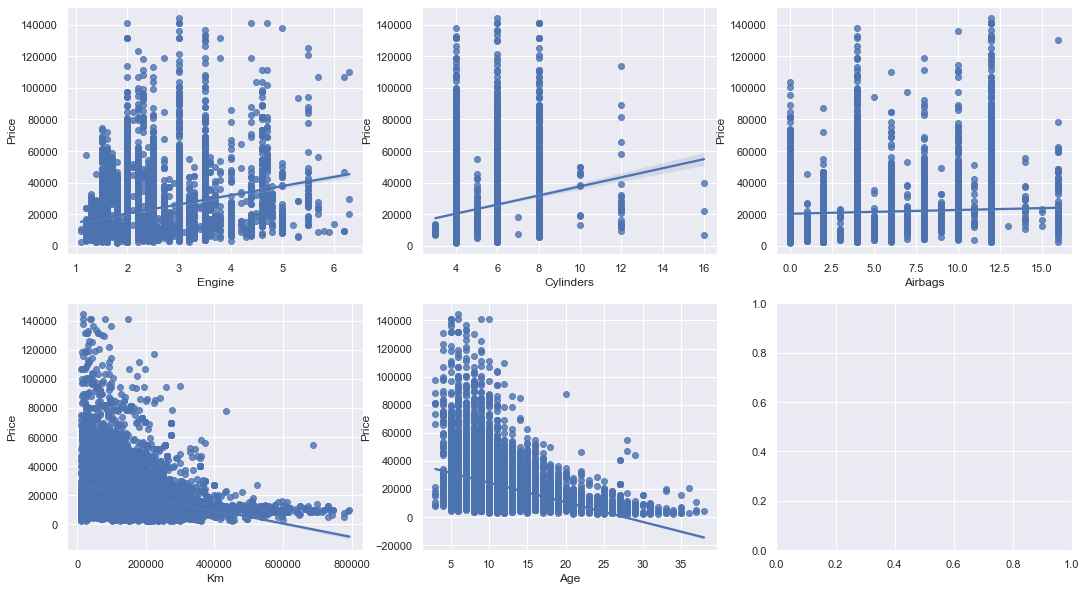

In [26]:
fig, ax = plt.subplots(2, 3, figsize = (18, 10))

for i, ax in enumerate(fig.axes):
    sns.regplot(x=num_var2[i], y='Price', data=data, ax=ax)
    if i == 4:
        break

## Categorical Variables

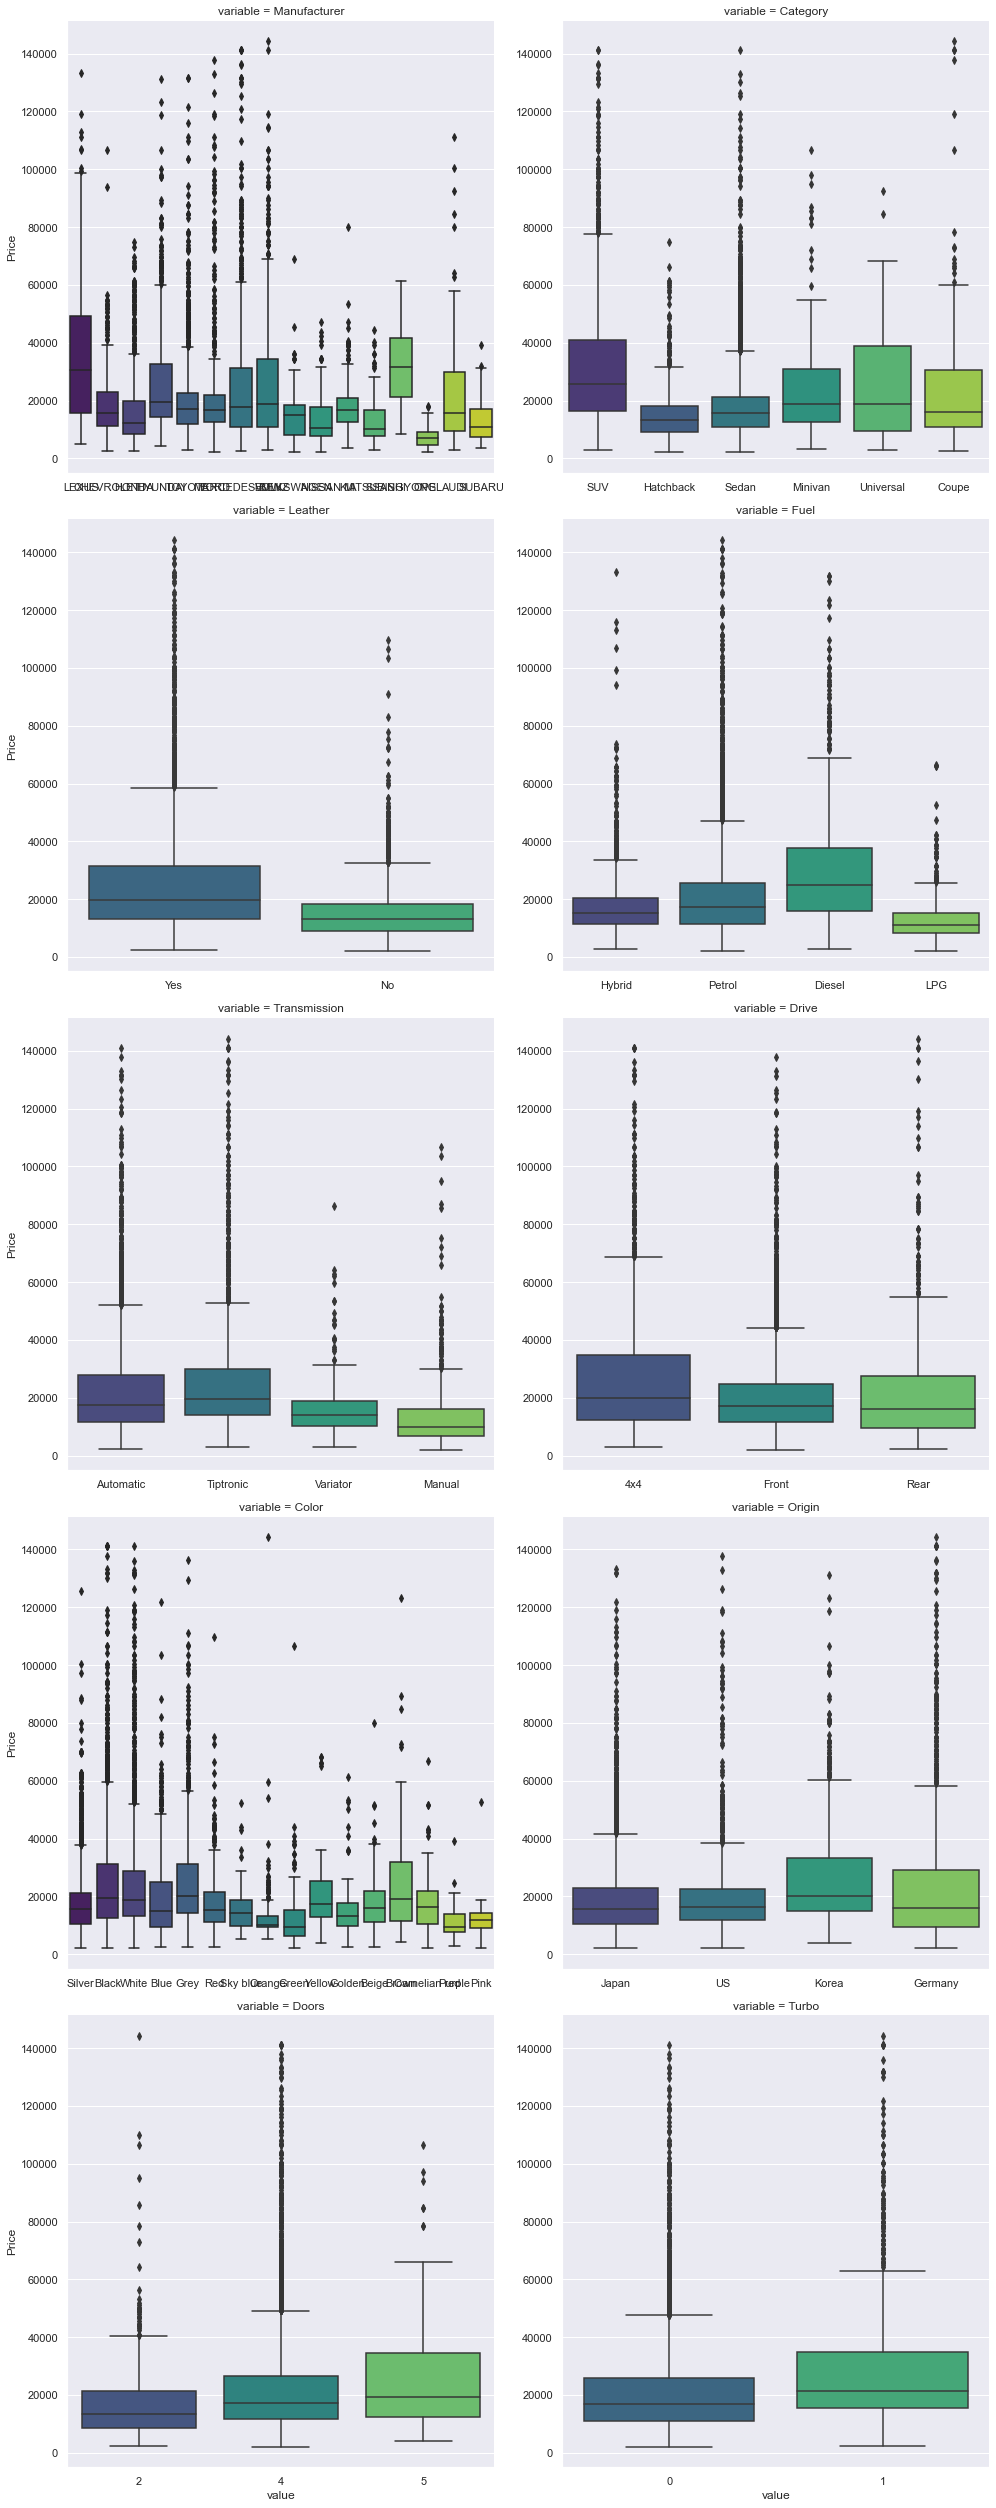

In [27]:
cat_var = ['Manufacturer', 'Category', 'Leather', 'Fuel', 'Transmission', 'Drive', 'Color', 'Origin','Doors', 'Turbo']
df_cat = data[cat_var]
df3 = df_cat.copy()
df3['Price'] = data.Price

f = pd.melt(df3, id_vars = 'Price', value_vars = cat_var)
g = sns.FacetGrid(f, col = "variable",  col_wrap = 2, sharex = False, sharey = False, size = 7)
g.map(sns.boxplot, 'value', 'Price', palette = 'viridis');

### There are too many outliers as I saw from boxplots with cat_var & target. I decided to making some trials.

# Model2

In [28]:
# I drop the Cylinders. 

# Model2

cat_var_m2 = ['Manufacturer', 'Category', 'Leather', 'Fuel', 'Transmission', 'Drive', 'Color', 'Origin','Doors']
num_var_m2 = ['Engine', 'Airbags', 'Km', 'Age','Turbo']
df_cat_m2 = data[cat_var_m2]
df_num_m2 = data[num_var_m2]
target = data.Price

df_cat_dummy_m2 = pd.get_dummies(df_cat_m2, drop_first = True) # drops one dummy
X = pd.concat([df_num_m2, df_cat_dummy_m2], axis = 1) # Concatenate dummy cat vars and num vars
y = np.log1p(target)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

r2 = mt.r2_score(y_test,prediction)
mse = mt.mean_squared_error(y_test,prediction)
rmse = mt.mean_squared_error(y_test,prediction,squared=False)
mae = mt.mean_absolute_error(y_test,prediction)

print("R2: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2:  0.6186859229329544
MSE:  0.15204167605967506
RMSE:  0.38992521854796086
MAE:  0.2993705007267769


### As I can see R2 score is improved without Cylinders.

# Model3

In [30]:
# I drop the Doors as it has domination. 
# Model 3

cat_var_m3 = ['Manufacturer', 'Category', 'Leather', 'Fuel', 'Transmission', 'Drive', 'Color', 'Origin']
num_var_m3 = ['Engine', 'Airbags', 'Km', 'Age','Turbo']
df_cat_m3 = data[cat_var_m3]
df_num_m3 = data[num_var_m3]
target = data.Price

df_cat_dummy_m3 = pd.get_dummies(df_cat_m3, drop_first = True) # drops one dummy
X = pd.concat([df_num_m3, df_cat_dummy_m3], axis = 1) # Concatenate dummy cat vars and num vars
y = np.log(target)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

r2 = mt.r2_score(y_test,prediction)
mse = mt.mean_squared_error(y_test,prediction)
rmse = mt.mean_squared_error(y_test,prediction,squared=False)
mae = mt.mean_absolute_error(y_test,prediction)

print("R2: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2:  0.6182904560370184
MSE:  0.15221997422778183
RMSE:  0.39015378279312096
MAE:  0.2993658963758446


### As Km and Age have non-linear relation with price I'll try same changes in those.

# Model4

In [40]:
# Km - Age root
# Model 4

cat_var_m4 = ['Manufacturer', 'Category', 'Leather', 'Fuel', 'Transmission', 'Drive', 'Color', 'Origin','Doors']
num_var_m4 = ['Engine', 'Airbags', 'Km', 'Age','Turbo']
df_cat_m4 = data[cat_var_m4]
df_num_m4 = data[num_var_m4]
df_num_m4['Km'] = df_num_m4['Km'] **0.5
df_num_m4['Age'] = df_num_m4['Age'] **0.5

target = data.Price

df_cat_dummy_m4 = pd.get_dummies(df_cat_m4, drop_first = True) # drops one dummy
X = pd.concat([df_num_m4, df_cat_dummy_m4], axis = 1) # Concatenate dummy cat vars and num vars
y = np.log(target)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

r2 = mt.r2_score(y_test,prediction)
mse = mt.mean_squared_error(y_test,prediction)
rmse = mt.mean_squared_error(y_test,prediction,squared=False)
mae = mt.mean_absolute_error(y_test,prediction)

print("R2: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2:  0.6222030189034201
MSE:  0.1506597035242911
RMSE:  0.38814907384185665
MAE:  0.2981945570583044


# Ridge with opt. alpha value

In [42]:
# Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)
prediction2 = ridge_model.predict(X_test)

r2_rid = mt.r2_score(y_test,prediction2)
mse_rid = mt.mean_squared_error(y_test,prediction2)
rmse_rid = mt.mean_squared_error(y_test,prediction2,squared=False)
mae_rid = mt.mean_absolute_error(y_test,prediction2)

print("R2: ", r2_rid)
print("MSE: ", mse_rid)
print("RMSE: ", rmse_rid)
print("MAE: ", mae_rid)

print("Train Score: ",ridge_model.score(X_train,y_train))
print("Test Score: ",ridge_model.score(X_test,y_test))

R2:  0.6222217475889662
MSE:  0.1506522348086767
RMSE:  0.38813945278556355
MAE:  0.29818511943604453
Train Score:  0.6262315116469079
Test Score:  0.6222217475889662


In [43]:
lambdas = 10**np.linspace(10,-2,100)*0.5
ridge_cv=RidgeCV(alphas=lambdas,scoring="r2")
ridge_cv.fit(X_train,y_train)
print(ridge_cv.alpha_)

4.055654153948428


In [44]:
# Ridge optimum value
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

ridge_model = Ridge(alpha=4.055654153948428)
ridge_model.fit(X_train,y_train)
prediction2 = ridge_model.predict(X_test)

r2_rid = mt.r2_score(y_test,prediction2)
mse_rid = mt.mean_squared_error(y_test,prediction2)
rmse_rid = mt.mean_squared_error(y_test,prediction2,squared=False)
mae_rid = mt.mean_absolute_error(y_test,prediction2)

print("R2: ", r2_rid)
print("MSE: ", mse_rid)
print("RMSE: ", rmse_rid)
print("MAE: ", mae_rid)

print("Train Score: ",ridge_model.score(X_train,y_train))
print("Test Score: ",ridge_model.score(X_test,y_test))

R2:  0.6388109559297765
MSE:  0.14153865008576738
RMSE:  0.3762162278341637
MAE:  0.29174652060272804
Train Score:  0.6243811052979822
Test Score:  0.6388109559297765


### Best model so far. Using Pipeline:

In [45]:
cat = ['Manufacturer', 'Category', 'Leather', 'Fuel', 'Transmission', 'Drive', 'Color', 'Origin','Doors']
num = ['Engine', 'Airbags', 'Km', 'Age','Turbo']
# for numericals: df_num_m4
# df_num_m4['Km'] = df_num_m4['Km'] **0.5
# df_num_m4['Age'] = df_num_m4['Age'] **0.5

X = pd.concat([df_num_m4, data[cat]], axis = 1)
y = np.log(target)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

num_transformer = Pipeline(steps=[('scale',  StandardScaler(with_mean=False))])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])                        
preprocessor = ColumnTransformer(transformers=[('categorical', cat_transformer, cat),
                                               ('numerical', num_transformer, num)],
                                               remainder = 'passthrough') 

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', Ridge(alpha=4.055654153948428))]) 

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

r2_rid = mt.r2_score(y_test,predictions)
rmse_rid = mt.mean_squared_error(y_test,predictions,squared=False)

print("R2: ", r2_rid)
print("RMSE: ", rmse_rid)
print("-----------------")
print("Train Score: ",pipeline.score(X_train,y_train))
print("Test Score: ",pipeline.score(X_test,y_test))

R2:  0.6387156591145775
RMSE:  0.37626585536912127
-----------------
Train Score:  0.6243320838509374
Test Score:  0.6387156591145775


# VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y = data0["Price"]
X = df_num

sabit = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variables"]= X.columns
vif["VIF"]=[variance_inflation_factor(sabit,i+1) for i in range(X.shape[1])]
vif

,Variables,VIF
0,Engine,2.656970
1,Cylinders,2.678445
2,Airbags,1.129302
3,Km,1.112364
4,Age,1.167844
5,Turbo,1.037117


### VIF results show that there are no Multicollinearity.